## Setup

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas as pd
import nltk
import nltk.sentiment

In [2]:
plt.ion()
plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(13, 7))

In [3]:
STOPWORDS = set(nltk.corpus.stopwords.words('english'))

In [4]:
def clean(text: str) -> list:
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    text = text.encode('ascii', 'ignore').decode('utf-8', 'ignore').lower()
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in STOPWORDS]

## codeup blog articles

In [5]:
df = pd.read_csv('big_blogs.csv').iloc[:, 1:]

In [6]:
df['words'] = df.content.apply(clean)

In [7]:
all_words = ' '.join(df.words.apply(' '.join))
# Most common 15 words
pd.Series(all_words.split()).value_counts().head(15)

codeup       834
data         606
job          390
student      388
career       376
developer    372
program      350
like         340
new          326
one          322
time         310
software     300
tech         296
science      284
get          264
dtype: int64

15 Most common bigrams

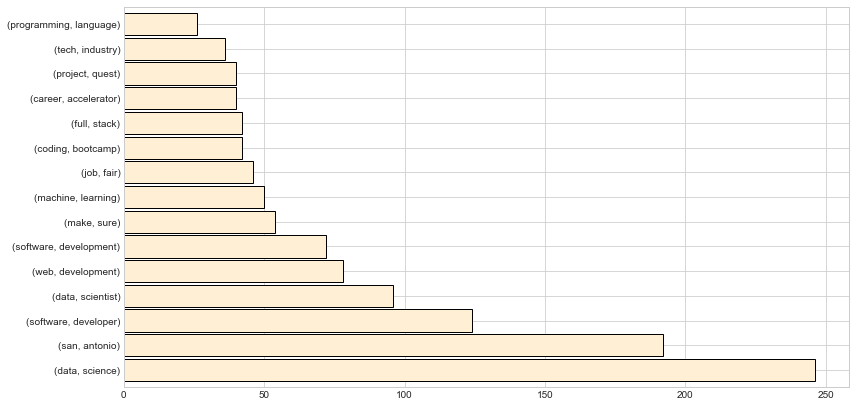

In [8]:
(
    df.words.apply(nltk.bigrams)
    .apply(pd.Series)
    .stack()
    .reset_index(drop=True)
    .value_counts()
    .head(15)
    .plot.barh(width=.9, ec='black', color='papayawhip')
)

In [9]:
df['title_length'] = df.title.apply(len)
df['content_length'] = df.content.apply(len)
df['word_count'] = df.words.apply(len)

sia = nltk.sentiment.SentimentIntensityAnalyzer()
df['sentiment'] = df.content.apply(lambda s: sia.polarity_scores(s)['compound'])

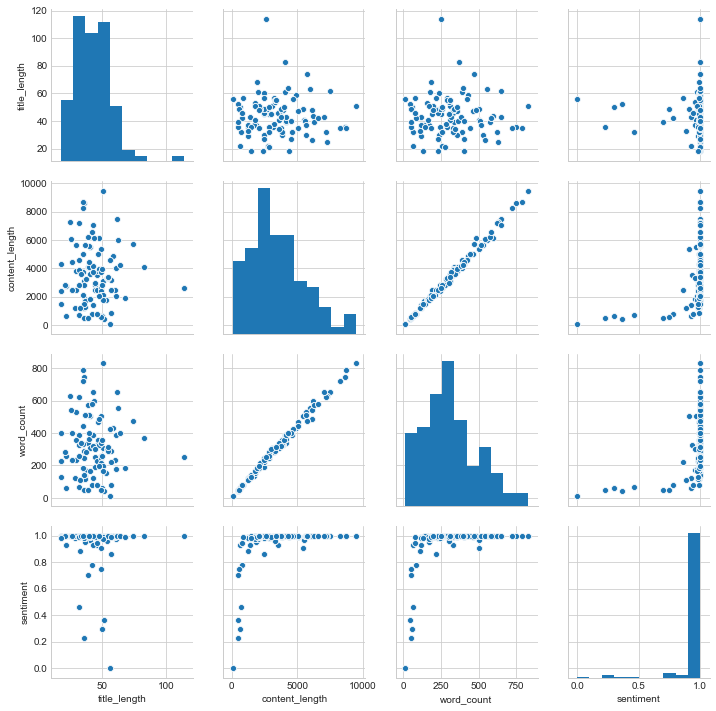

In [10]:
sns.pairplot(df)

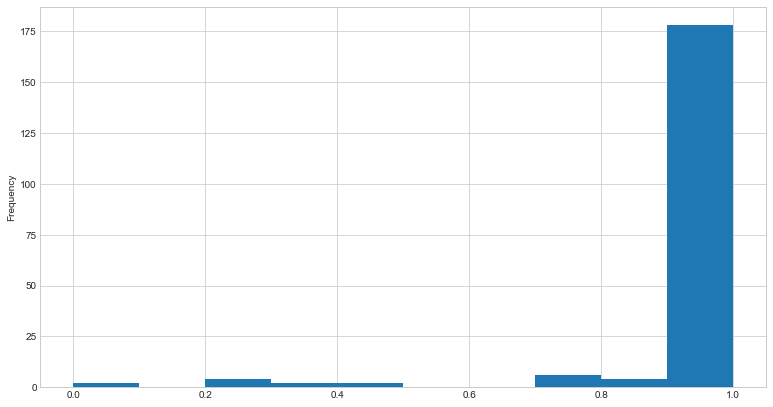

In [11]:
df.sentiment.plot.hist()

## inshorts news articles

In [12]:
df = pd.read_csv('articles.csv').iloc[:, 1:]

In [13]:
df.head(3).T

,0,1,2
topic,business,business,business
title,There's firm belief that we'll set example in ...,"Tamil Nadu CM invites Amazon CEO Bezos, Apple ...",Infosys CEO Salil Parekh's compensation rises ...
author,Ankush Verma,Dharna,Dharna
content,In a letter to citizens amid coronavirus outbr...,Tamil Nadu Chief Minister Edappadi Palaniswami...,Infosys CEO Salil Parekh's compensation rose 2...


In [14]:
df['words'] = df.content.apply(clean)

In [15]:
all_words = ' '.join(df.words.apply(' '.join))

Most common 15 words

In [16]:
pd.Series(all_words.split()).value_counts().head(15)

said       66
india      26
added      23
u          19
crore      17
also       16
company    16
time       15
nasa       15
people     15
year       15
wrote      14
kohli      14
spacex     14
two        14
dtype: int64

15 Most common bigrams

In [17]:
(
    df.words.apply(nltk.bigrams)
    .apply(pd.Series)
    .stack()
    .reset_index(drop=True)
    .value_counts()
    .head(15)
)

(nasa, astronaut)          8
(virat, kohli)             7
(elon, musk)               6
(lakh, crore)              6
(musk, said)               6
(coronavirus, pandemic)    5
(amid, coronavirus)        5
(george, floyd)            4
(sri, lanka)               4
(pronounced, x)            4
(arjuna, award)            4
(shared, video)            4
(crew, dragon)             4
(x, axii)                  4
(khel, ratna)              4
dtype: int64

In [18]:
df['title_length'] = df.title.apply(len)
df['content_length'] = df.content.apply(len)
df['word_count'] = df.words.apply(len)

In [19]:
sia = nltk.sentiment.SentimentIntensityAnalyzer()
df['sentiment'] = df.content.apply(lambda s: sia.polarity_scores(s)['compound'])

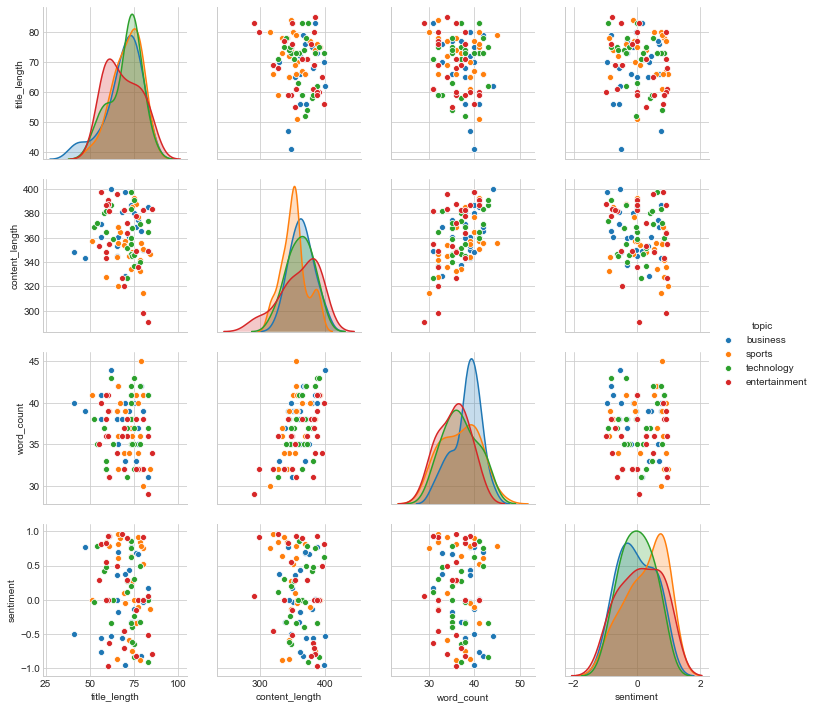

In [20]:
sns.pairplot(df, hue='topic')

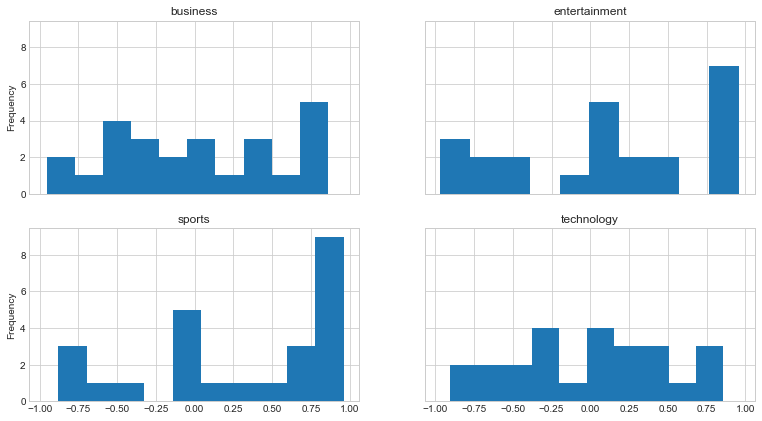

In [21]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
for ax, (topic, x) in zip(axs.ravel(), df.groupby('topic').sentiment):
    x.plot.hist(ax=ax, title=topic)

Does topic make a differnce in any of our continuos measures?

In [22]:
df.groupby('topic').describe().T

topic                   business  entertainment      sports  technology
title_length   count   25.000000      24.000000   25.000000   25.000000
               mean    69.080000      68.458333   71.120000   70.120000
               std     10.439987       9.568877    7.917912    8.477028
               min     41.000000      55.000000   51.000000   52.000000
               25%     65.000000      60.000000   66.000000   63.000000
               50%     72.000000      68.500000   73.000000   73.000000
               75%     76.000000      76.250000   77.000000   75.000000
               max     83.000000      85.000000   84.000000   83.000000
content_length count   25.000000      24.000000   25.000000   25.000000
               mean   364.280000     360.916667  352.400000  361.640000
               std     17.987310      30.319913   19.805302   20.051766
               min    329.000000     291.000000  315.000000  320.000000
               25%    350.000000     346.750000  342.000000  347.000000
               50%    361.000000     368.000000  354.000000  365.000000
               75%    375.000000     384.750000  357.000000  374.000000
               max    400.000000     398.000000  393.000000  398.000000
word_count     count   25.000000      24.000000   25.000000   25.000000
               mean    38.320000      35.500000   36.880000   36.960000
               std      3.158586       3.349237    4.075537    3.634098
               min     31.000000      29.000000   30.000000   31.000000
               25%     37.000000      32.000000   34.000000   35.000000
               50%     39.000000      36.000000   37.000000   37.000000
               75%     40.000000      38.000000   40.000000   40.000000
               max     44.000000      41.000000   45.000000   43.000000
sentiment      count   25.000000      24.000000   25.000000   25.000000
               mean    -0.009212       0.122629    0.280980    0.007416
               std      0.561219       0.648197    0.616279    0.509376
               min     -0.953800      -0.969800   -0.880700   -0.904300
               25%     -0.493900      -0.473100   -0.102700   -0.340000
               50%     -0.025800       0.025800    0.526700    0.000000
               75%      0.440400       0.818350    0.809600    0.421500
               max      0.859100       0.957800    0.963900    0.859100

Maybe just in sentiment

In [23]:
df.groupby('topic').sentiment.describe()

,count,mean,std,min,25%,50%,75%,max
topic,,,,,,,,
business,25.0,-0.009212,0.561219,-0.9538,-0.4939,-0.0258,0.44040,0.8591
entertainment,24.0,0.122629,0.648197,-0.9698,-0.4731,0.0258,0.81835,0.9578
sports,25.0,0.280980,0.616279,-0.8807,-0.1027,0.5267,0.80960,0.9639
technology,25.0,0.007416,0.509376,-0.9043,-0.3400,0.0000,0.42150,0.8591


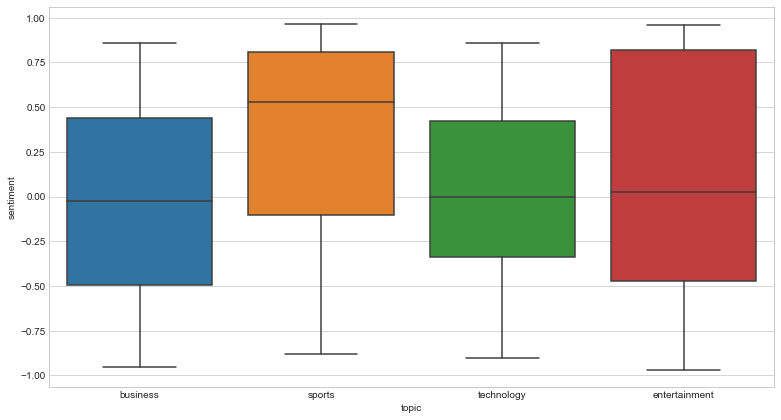

In [24]:
sns.boxplot(y='sentiment', x='topic', data=df)

In [25]:
most_negative_article = df.sort_values(by='sentiment').head(1)
most_positive_article = df.sort_values(by='sentiment').tail(1)

In [26]:
print('--- Most negative article\n')
print(most_negative_article.topic.values[0] + ':', most_negative_article.title.values[0])
print()
print(most_negative_article.content.values[0])

--- Most negative article

entertainment: Actor files case against Devoleena's fans over death threats

Days after filing a cybercrime complaint against Devoleena Bhattacharjee for allegedly tarnishing his image, actor Mayur Verma has filed a cybercrime complaint against the actress' fans. "On Twitter, some group of people are threatening to kill me...I'm very much afraid," he wrote in his complaint. Furthermore, Mayur said Devoleena's fans have threatened to enter his house to kill him.


In [27]:
print('--- Most positive article\n')
print(most_positive_article.topic.values[0] + ':', most_positive_article.title.values[0])
print()
print(most_positive_article.content.values[0])

--- Most positive article

sports: At this phase of my career, I'm enjoying my cricket: Ishant Sharma

India pacer Ishant Sharma, who has played 97 Tests and 80 ODIs, has said that he's currently in a phase of his career where he's enjoying his cricket. "The more I enjoy, the better it is. I'll take more wickets and win matches for the team," he added. Ishant has been nominated by the BCCI for this year's Arjuna Award. 
